
**Classificando e comparando isis-dataset utilizando KNN e MLP**

Por:
* Arthur Souza Cruz
* Eduardo Fernando de Lima

Importações

In [0]:
print(__doc__)

import math
import random
import copy
from timeit import default_timer as timer


from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split

import numpy as np


Automatically created module for IPython interactive environment


Classificação utilizando o KNN implementado no scikit

In [0]:
TEST_PERCENTAGE = 0.2
NUMBER_OF_NEIGHBORS = [3,5,10,15,20]

# importa o dataset iris
iris = datasets.load_iris()

# atribui os dados e as predições
X = iris.data
y = iris.target

data_training, data_test, result_training, result_test = train_test_split(X, y, test_size=TEST_PERCENTAGE, random_state=43)

results_knn = []

for number_of_neighbors in NUMBER_OF_NEIGHBORS:
  clf = neighbors.KNeighborsClassifier(number_of_neighbors)
  classifier_fit_start_time = timer()
  clf.fit(data_training, result_training)
  classifier_fit_end_time = timer()
  
  accuracy = clf.score(data_test, result_test) * 100
  time_spent = classifier_fit_end_time - classifier_fit_start_time
  results_knn.append({"n_neighbords": number_of_neighbors,"time": time_spent , "accuracy" : accuracy})



Plotando um gráfico simples para ver como o KNN classificou o dataset com alcance de 5 vizinhos

(1.0, 4.999999999999999)

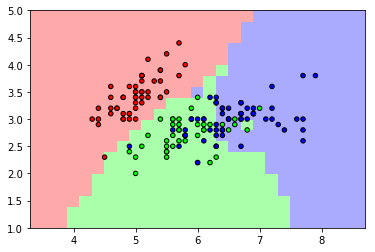

In [0]:
## PARA PLOTAR O GRÁFICO ##

# Define as cores
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

# Pega só as duas primeiras variáveis para desenhar um gráfico
data_training_for_plot = data_training[:, :2]
  
#Este classificador serve somente para plotar o gráfico
clf_for_plot = neighbors.KNeighborsClassifier(5)
clf_for_plot.fit(data_training_for_plot, result_training)


# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = data_training_for_plot[:, 0].min() - 1, data_training_for_plot[:, 0].max() + 1
y_min, y_max = data_training_for_plot[:, 1].min() - 1, data_training_for_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))
Z = clf_for_plot.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


No bloco abaixo está nossa implementação de uma rede neural multicamadas utilizada anteriormente para classificação do Iris Dataset.

Para saber mais sobre ele acesse o seguinte link compartilhavel :

https://drive.google.com/file/d/1_AVv_vfR62SK0HOxVhX9UDjJYNoKbWGE/view?usp=sharing


In [0]:

# Change classification to int values
def get_classification_value(classification):
    if(classification == "Iris-setosa"):
        return 0
    if(classification == "Iris-versicolor"):
        return 1
    if(classification == "Iris-virginica"):
        return 2


# Convert string list to float list
def change_string_to_float(string_list):
    float_list = []
    for i in range(len(string_list)):
        float_list.append(float(string_list[i]))
    return float_list


# Matrix multiplication (for Testing)
def matrix_mul_bias(A, B, bias):
    C = []
    for i in range(len(A)):
        C.append([])
        for j in range(len(B[0])):
            C[i].append(0)
    
    for i in range(len(A)):
        for j in range(len(B[0])):
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j]
            C[i][j] += bias[j]
    
    return C


# Vector (A) x matrix (B) multiplication
def vec_mat_bias(A, B, bias):
    C = []
    for i in range(len(B[0])):
        C.append(0)
    
    for j in range(len(B[0])):
        for k in range(len(B)):
            C[j] += A[k] * B[k][j]
        C[j] += bias[j]
    
    return C


# Matrix (A) x vector (B) multipilicatoin (for backprop)
def mat_vec(A, B): 
    C = []
    for i in range(len(A)):
        C.append(0)
    
    for i in range(len(A)):
        for j in range(len(B)):
            C[i] += A[i][j] * B[j]
    return C


# derivation of sigmoid (for backprop)
def sigmoid(A, deriv=False):
    if deriv: 
        for i in range(len(A)):
            A[i] = A[i] * (1 - A[i])
    else:
        for i in range(len(A)):
            A[i] = 1 / (1 + math.exp(-A[i]))
    return A




train_set = copy.deepcopy(data_training)
train_result = copy.deepcopy(result_training)

test_set = copy.deepcopy(data_test)
test_result = copy.deepcopy(result_test)

alpha = 0.01
epoch = 700
neurons = [4, 6, 3] # number of neurons each layer


# Initiate weight and bias with 0 value
weights = []
for i in range(len(neurons) - 1):
    weights.append([])
    for j in range(neurons[i]):
        weights[i].append([])
        for k in range(neurons[i + 1]):
            weights[i][j].append(0)

weight = []
for i in range(len(weights[0])):
    weight.append([])
    for j in range(len(weights[0][i])):
        weight[i].append(weights[0][i][j])

weight_2 = []
for i in range(len(weights[1])):
    weight_2.append([])
    for j in range(len(weights[1][i])):
        weight_2[i].append(weights[1][i][j])


bias_list = []
for i in range(1, len(neurons)):
    bias_list.append([])
    for j in range(neurons[i]):
        bias_list[i-1].append(0)

bias = []
for i in range(len(bias_list[0])):
    bias.append(bias_list[0][i])

bias_2 = []
for i in range(len(bias_list[1])):
    bias_2.append(bias_list[1][i])

# Initiate weight with random between -1.0 ... 1.0
for i in range(neurons[0]):
    for j in range(neurons[1]):
        weight[i][j] = 2 * random.random() - 1

for i in range(neurons[1]):
    for j in range(neurons[2]):
        weight_2[i][j] = 2 * random.random() - 1

        
classifier_fit_start_time = timer()
for e in range(epoch):
    cost_total = 0
    for idx, data_list in enumerate(train_set): # Update for each data; SGD


        # Forward propagation
        h_1 = vec_mat_bias(data_list, weight, bias)
        X_1 = sigmoid(h_1)
        h_2 = vec_mat_bias(X_1, weight_2, bias_2)
        X_2 = sigmoid(h_2)



        # Convert to One-hot target
        target = [0] * neurons[-1]
        target[int(train_result[idx])] = 1


        # Cost function, Square Root Eror
        eror = 0
        for i in range(neurons[-1]):
            eror +=  0.5 * (target[i] - X_2[i]) ** 2 
        cost_total += eror

        # Backward propagation
        delta_2 = []
        for j in range(neurons[2]):
            delta_2.append(-1 * (target[j]-X_2[j]) * X_2[j] * (1-X_2[j]))


        for i in range(neurons[1]):
            for j in range(neurons[2]):
                weight_2[i][j] -= alpha * (delta_2[j] * X_1[i])
                bias_2[j] -= alpha * delta_2[j]

        delta_1 = mat_vec(weight_2, delta_2)
        for j in range(neurons[1]):
            delta_1[j] = delta_1[j] * (X_1[j] * (1-X_1[j]))


        # Update weight and bias (layer 1)
        delta_1 = mat_vec(weight_2, delta_2)
        for j in range(neurons[1]):
            delta_1[j] = delta_1[j] * (X_1[j] * (1-X_1[j]))

        for i in range(neurons[0]):
            for j in range(neurons[1]):
                weight[i][j] -=  alpha * (delta_1[j] * data_list[i])
                bias[j] -= alpha * delta_1[j]


    cost_total /= len(train_set)
    if(e % 100 == 0):
        print("Erro da epoca ", e, ": ", cost_total)
    elif(e == epoch - 1):
        print("Erro da ultima epoca: ", cost_total)

classifier_fit_end_time = timer()



res = matrix_mul_bias(test_set, weight, bias)
res_2 = matrix_mul_bias(res, weight_2, bias_2)


# Get prediction
preds = []
for r in res_2:
    preds.append(max(enumerate(r), key=lambda x:x[1])[0])

for i in range(len(test_result)):
    test_result[i] = int(test_result[i])
# Print prediction
print("Resultado esperado: ", test_result)
print("Predição:", preds)


# Calculate accuration
acc = 0.0
for i in range(len(preds)):
    if preds[i] == int(test_result[i]):
        acc += 1
        
acc = acc / len(preds) * 100
print(acc, "%")

time_spent = classifier_fit_end_time - classifier_fit_start_time
results_knn.append({"our_classification": "Nossa Classificação", "time": time_spent , "accuracy" : acc})

Erro da epoca  0 :  0.5620899126650946
Erro da epoca  100 :  0.18971876551112718
Erro da epoca  200 :  0.1653407468187153
Erro da epoca  300 :  0.11611958072299107
Erro da epoca  400 :  0.06906314530654964
Erro da epoca  500 :  0.0468321829531496
Erro da epoca  600 :  0.03638272979449352
Erro da ultima epoca:  0.03071919386945383
Resultado esperado:  [0 0 2 1 2 0 2 1 1 1 0 1 2 0 1 1 0 0 2 2 0 0 0 2 2 2 0 1 0 0]
Predição: [0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 0, 1, 0, 0]
73.33333333333333 %


Comparações:

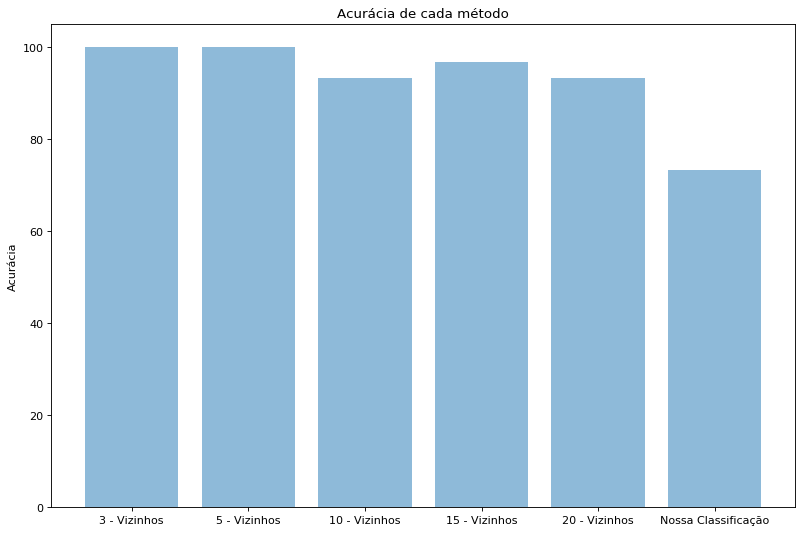

In [0]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

#tuza, adiciona aqui depois os seus resultados relacionados a accuracia
objects = []
scores = []


for result in results_knn[:-1]:
  objects.append(str(result["n_neighbords"]) + " - Vizinhos")
  scores.append(result["accuracy"])

objects.append(results_knn[-1]["our_classification"])
scores.append(results_knn[-1]["accuracy"])
  
y_pos = np.arange(len(objects))

plt.bar(y_pos, scores, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Acurácia')
plt.title(f"Acurácia de cada método")

plt.show()

Tempos:
	3 - Vizinhos: 0.0036673130000011156
	5 - Vizinhos: 0.00038802299999929346
	10 - Vizinhos: 0.00035535800000019435
	15 - Vizinhos: 0.0003696610000005762
	20 - Vizinhos: 0.00036641899999523275
	Nossa Classificação: 7.457781295000004


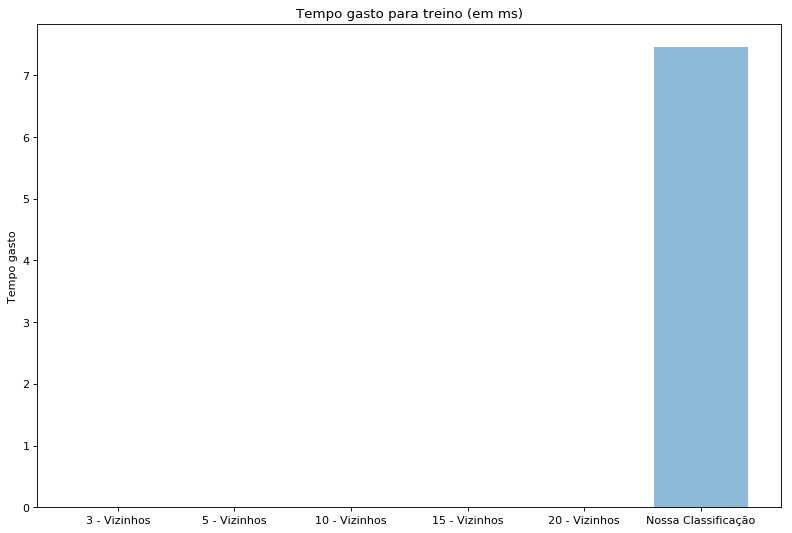

In [0]:
figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
#tuza, adiciona aqui depois os seus resultados relacionados a tempo
objects = []
times = []
print("Tempos:")
for result in results_knn[:-1]:
  objects.append(str(result["n_neighbords"]) + " - Vizinhos")
  times.append(result["time"])
  print("\t" + str(result["n_neighbords"]) + " - Vizinhos: " + str(result["time"]))

objects.append(str(results_knn[-1]["our_classification"]))
times.append(results_knn[-1]["time"])
print("\t" + str(results_knn[-1]["our_classification"]) + ": " + str(results_knn[-1]["time"]))
  
y_pos = np.arange(len(objects))

plt.bar(y_pos, times, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Tempo gasto')
plt.title(f"Tempo gasto para treino (em ms)")

plt.show()